# Assignment 2 - Machine Learning Basics

## *Joaquin Menendez*
Netid:  *jm622*

Github link: *https://gitlab.oit.duke.edu/ids705-sp19/joaquinmenendez/tree/master/Assignment_2*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.<br>
A flexible model would be my first option. Given that I do not know the data distribution, and  also I can take advantage the big sample size to train my model, I would prefer to fit a flexible model. Unless the distribution of this sample was clearly linear. The information provided do not let me know that so, I would chose the Flexibel model.

2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.<br>
I think that if an inflexible model could be fitted with a low MSE, despite having multiple predictors, is going to be less sensitive to the variance when tested against new cases. A flexible model is going to be prone to overfitting, implying low performance on the test of new cases. Altough, this claim  will be only true if the number of my predictors is < than my number of samples. If there is a very big assymetry, is going to be difficult to fit a inflexible model (as a linear regression, assuming that parametric models are less flesible than no parametric), in this case I would say that the flexible model would be better.

3. The relationship between the predictors and response is highly non-linear.<br>
It depends on the type on non linear relationship. Some types of non-linear realtionship could be modelated using non-linear transformation (as a quadratic or log transformation). So, in these cases, the model could be very inflexible (as for example a linear regression with a quadratic $\beta_i$,  $y = \beta_0 + \beta_1 x_1 + \beta_2 x_1$). Such cases could be better than flexible models. On the other hand, when the relationship do not have an aproachable transformation, a flexible method would fit better than an inflexible one given that this last one could be extremely biased. Given that the above statement say: 'Highly non-linear' I would choice the flexible one.

4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high.<br>
Given that a flexible model would try to take in count the variability of the training dataset, is going to introduce noise to the final model. A inflexible model would be a good approach, despite that could be biasing (or oversimplifying the real relationship of our data).


## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.<br>
Predictors/Independent Variables= 3 {record profit, number of employees, industry}
Targe/depedent variable = CEO salary
Assuming each firm has only one CEO the Sample size would be  500. 
This is a case of regression. The interest is on the amount of money or salary a CEO  earns (a quantitative variable). It seems that the principal interest is to understand the relation of 3 independent variables with the salary and how they modulate it, so I would say this is an inference problem. 

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.<br>
Predictors/Independent Variables= 13 {price charged for the product, marketing budget, competition price, and ten other variables}
Targe/depedent variable = Succes or failure
Assuming each product has the 13 variables collected the sample size would be 20. 
The principal interest in this case seems to be the prediction of the succes of a specific product (binary variable {succes or failure}), ergo is a classification problem.


**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.<br>
Predictors/Independent Variables = 3  {eekly % change in the US market,  Weekly % change in the British market,  Weekly % change in the German market}
Targe/depedent variable = % change in the US dollar.
Given a year has 52 weeks,  the sample size will be 52.
Given that the interest in this case is to predict the estimate value of the US dollar we can afirm that this is a regression problem.


# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [1]:
# (a) Write your own kNN classifier

# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import time
import sklearn as sk
from scipy import stats

In [534]:
#Make a Knn class
class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        return
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x =  x.values #np.array(x)
        self.y =  y.values #np.array(y)
        return
    # I need to check if this is going to be 
    def assign_label(distances, y, k):
        sort_index = np.zeros((distances.shape[0],distances.shape[0]))
        labels = np.zeros((y.shape[0], k))   # Only one dimension vector, because the Y dataset is a list with labels
        for row in range(0,distances.shape[0]):
            sort_index[row] = (np.argsort(distances[row,:]))
           
        for n_label in range(0,k):
            index = int(sort_index[row][n_label]) # I scrap the index 
            #print(index)
            labels[row][n_label] = y[index] # is going to make a dataframe with rows being the row order from the X data,
                                            # and on the columns the labels from KN.
        return labels 
            
    def average_labels(labels,row):
        return round(np.mean(labels[row]),0)
    
    def predict(self, x_test, k):
        self.k = k
        self.x_test =  x_test.values
        y_hat = np.zeros((self.y.shape[0],1)) # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        distances = np.zeros((self.x_test.shape[0],self.x_test.shape[0])) # a -> number of features that we are going to use as origin. ROWS 
                                                                # b -> number of features that we are going to compare with.  
                # Alwasy is going to be a square matrix because we are going to compare all the values against each other.
        self.distances = distances
        for row in range(0,self.x_test.shape[0]):   # Testing X
            for row2 in range(0,self.x.shape[0]):  # Training X
                col2 = row2
                distances[row,col2] = sp.spatial.distance.euclidean(self.x_test[row,:],self.x[row2,:])   #
        labels = assign_label(distances,self.y,k) # Y Training.
        self.labels = labels
        # Return the estimated targets
        for row in range(0,y_hat.shape[0]):
            y_hat[row] = average_labels(self.labels,row)
        self.y_hat = y_hat
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    y = y.values
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    accuracy = float(accuracy)
    return accuracy

In [482]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each

In [527]:
#Importing datasets
Xlow = pd.read_csv('./data/A2_X_train_low.csv', header=-1)
Ylow = pd.read_csv('./data/A2_y_train_low.csv', header=-1)
Xhigh = pd.read_csv('./data/A2_X_train_high.csv', header=-1)
Yhigh = pd.read_csv('./data/A2_y_train_high.csv', header=-1)
test_Xlow = pd.read_csv('./data/A2_X_test_low.csv', header=-1)
test_Ylow = pd.read_csv('./data/A2_y_test_low.csv', header=-1)
test_Xhigh = pd.read_csv('./data/A2_X_test_high.csv', header=-1)
test_Yhigh = pd.read_csv('./data/A2_y_test_high.csv', header=-1)

In [590]:
start = time.time()
model = Knn()
model.fit(x=Xlow,y=Ylow)
yhat = model.predict(k=5, x_test=test_Xlow)
acc_low = accuracy(test_Ylow,yhat)
end = time.time()
t_low = end - start
print('Time [sec] for low-dimensionality: %f' % t_low)
print('The accuracy of the low-dimensional model is: %f' %acc_low)

Time [sec] for low-dimensionality: 16.187975
The accuracy of the low-dimensional model is: 0.925000


In [592]:
start = time.time()
model = Knn()
model.fit(x=Xhigh,y=Yhigh)
yhat = model.predict(k=5, x_test=test_Xhigh)
acc_high = accuracy(test_Yhigh,yhat)
end = time.time()
t_high = end - start
print('Time [sec] for High-dimensionality: %f' % t_high)
print('The accuracy of the High-dimensional model is: %f' %acc_high)

Time [sec] for High-dimensionality: 17.769409
The accuracy of the High-dimensional model is: 0.993000


c) 

In [593]:
start = time.time()
model = sk.neighbors.KNeighborsClassifier(n_neighbors= 5)
model.fit(X=Xhigh,y=Yhigh)
acc = model.score(X=test_Xhigh,y=test_Yhigh)
end = time.time()
s_t_high = end - start
print('Time [sec] for High-dimensionality using Scikit: %f' % s_t_high)
print('The accuracy of the High-dimensional model is: %f' %acc)

C:\Users\joaqu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Time [sec] for High-dimensionality using Scikit: 0.218408
The accuracy of the High-dimensional model is: 0.993000


In [587]:
start = time.time()
model = sk.neighbors.KNeighborsClassifier(n_neighbors= 5)
model.fit(X=Xlow,y=Ylow)
acc = model.score(X=test_Xlow,y=test_Ylow)
end = time.time()
s_t_low = end - start
print('Time [sec] for Low-dimensionality using Scikit: %f' % s_t_low)
print('The accuracy of the Low-dimensional model is: %f' %acc)

Time [sec] for Low-dimensionality using Scikit: 0.006981
The accuracy of the Low-dimensional model is: 0.925000


C:\Users\joaqu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [604]:
print('When we observe the accuracy of the different models, we do not observe differences between the models.\nWhen we compare the difference between speed of the different algorithm we observe that the scikit learning algorithm is %.2f  faster for the low dimensional dataset and %.2f  faster for the High dimensional' % (t_low/s_t_low,t_high/s_t_high))

When we observe the accuracy of the different models, we do not observe differences between the models.
When we compare the difference between speed of the different algorithm we observe that the scikit learning algorithm is 2318.90  faster for the low dimensional dataset and 81.36  faster for the High dimensional


 e) What are the drawbacks of the prediction process being slow? The principal drawback of a model with low prediction speed is that is not suitable for real-time analysis where the data stream is very fast. In these cases the analysis will be always late to predict future events.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [826]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

#a)

matrix = np.zeros((1,6))
prediction = np.array([0,0,0])
for n,row in enumerate(X):
    matrix[0][n] = (sp.spatial.distance.euclidean(row,prediction))

In [827]:
Matrix = pd.DataFrame(data = {'Obs': range(1,7),
                              'x1' : X.T[0][:],
                              'x2' : X.T[1][:],
                              'x3' : X.T[2][:],
                              'Distance to 0' : matrix[0][:],
                               'y' : y})
Matrix

,Obs,x1,x2,x3,Distance to 0,y
0,1,0,3,0,3.000000,r
1,2,2,0,0,2.000000,r
2,3,0,1,3,3.162278,r
3,4,0,1,2,2.236068,b
4,5,-1,0,1,1.414214,b
5,6,1,1,1,1.732051,r


**ANSWER**:

b)
If we use a K=1 to try to classify this $(0,0,0)$ vector, the label would be `Blue`. Given that the unique closest value (KNN = 1) to $(0,0,0)$ is the $4^{th}$ observation, and the category of this observation is blue,  the output of the $(0,0,0)$ would be `Blue`.

c) Using a K=3 the the vector $(0,0,0)$ would be classified as `Red`. The 3 closest neighbors to this vector would be the $4^{th},5^{th},2^{nd}$ observations, in that order. Given that we have 2 red observations ($2^{nd}$ and $5^{th}$) and ony one blue ($4^{th}$ observation) the output would be `Red`.

d) If the Bayes decision boundary is very non-linear is going to be better to have a low number of K. This is because when the number ok K increase the model becomes less flexible, ergo more close to a linear decision boundary.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

In [2]:
from sklearn.datasets import make_moons

In [355]:
syncdat = make_moons(n_samples=1000, noise= 0.35) #It creates a 2D data set (2 parameters) with 2 possible labels. 
#Standard deviation of Gaussian noise added to the data (0.35)

In [356]:
df = pd.DataFrame(data = syncdat[0], columns=['Param1', 'Param2'])
df['Label'] = syncdat[1]
df.head(10)

,Param1,Param2,Label
0,1.543572,0.402289,1
1,1.045721,-1.146682,1
2,1.202235,0.015100,0
3,1.627151,0.905906,0
4,1.066303,-0.347872,0
5,-0.064880,-0.482978,1
6,-0.086354,0.784426,0
7,1.093024,-0.670836,1
8,-0.979049,0.870783,0
9,-1.029262,0.011471,0


Text(0.5,1,"Synthetic dataset's scatter plot")

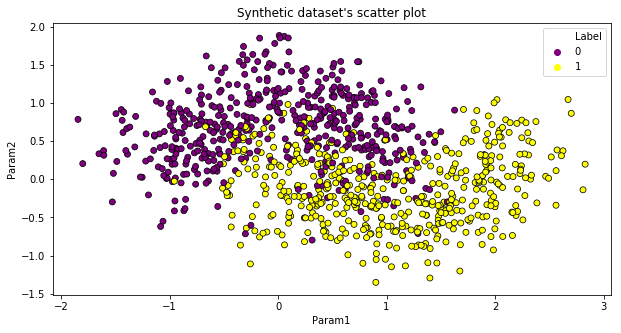

In [357]:
import seaborn as sbn
#color = {1: 'b', 2 : 'r'}
#plt.scatter ( x = df['Param1'], y = df['Param2'], color = [color[i] for i in df['Label']])
plt.figure(figsize = (10,5))
sbn.scatterplot( x= 'Param1', y = 'Param2', hue = 'Label',  palette=('Purple','Yellow'),edgecolor = 'k' ,data= df)
plt.title("Synthetic dataset's scatter plot")

In [365]:
df1 = df.sample(n=100)
df2 = df.sample(n=100)
df3 = df.sample(n=100)
dfn = [df1 , df2, df3]
dfn?

Type:        list
String form:
[       Param1    Param2  Label
           296  0.244068 -0.816907      1
           829  1.185332  0.256444      1
           259 <...> 566      0
           981  0.964548  0.239020      0
           876  0.722524  0.735953      0
           
           [100 rows x 3 columns]]
Length:      3
Docstring:  
list() -> new empty list
list(iterable) -> new list initialized from iterable's items


In [366]:
models = []

for dataf in dfn:
    for k in [1,25,50]:

        model = sk.neighbors.KNeighborsClassifier(n_neighbors= k)
        X = dataf.drop('Label', axis=1)
        model = model.fit(X=X,y=dataf['Label'])
        models.append(model)

#models[1].score(X= df.drop('Label', axis=1),y=df['Label'])


Text(0.08,0.78,'Random\n sample 1')

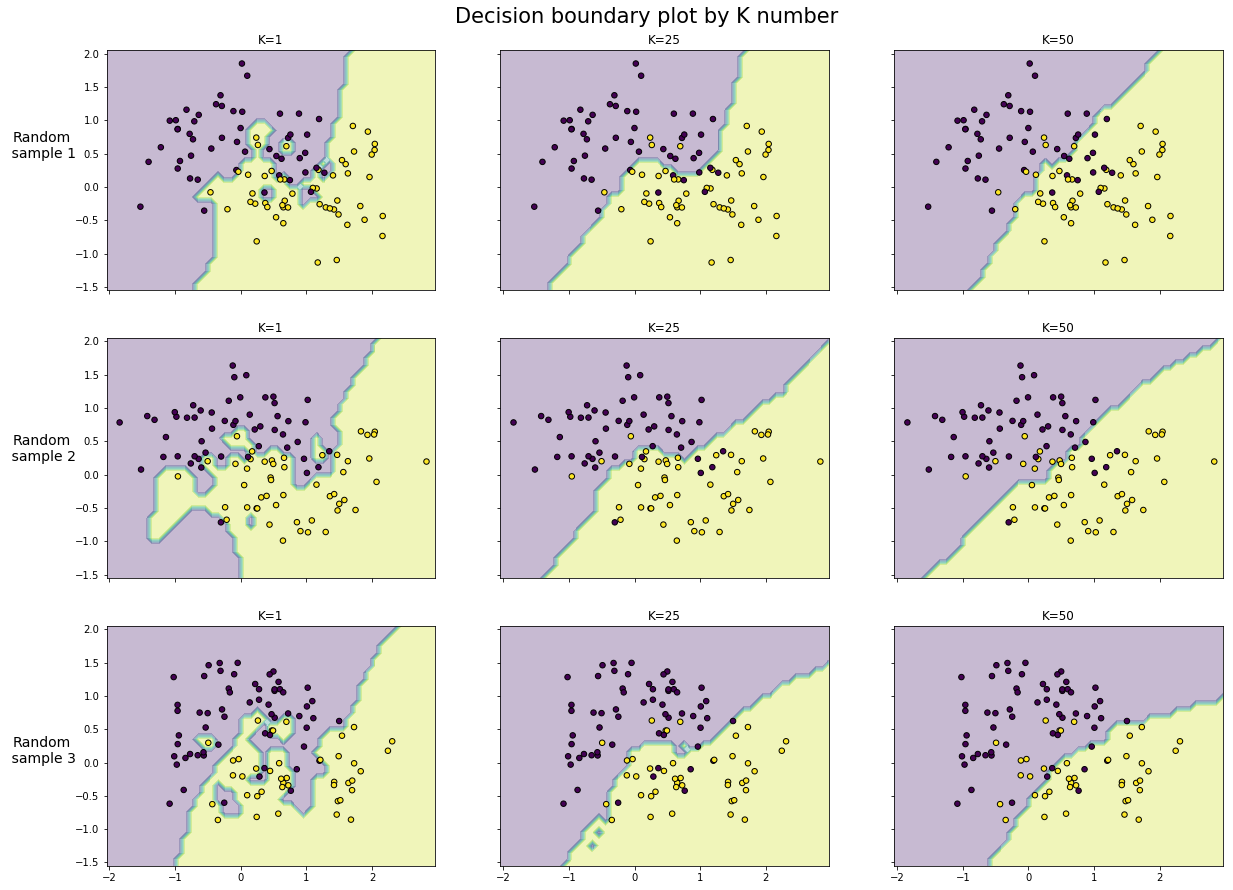

In [368]:
# Plotting decision regions

f, axarr = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 15) )
f.suptitle('Decision boundary plot by K number',size = 21, y = 0.92)

for idx, model, title,labels in zip(([0, 0], [0, 1], [0,2],[1, 0], [1, 1], [1,2],[2, 0], [2, 1], [2,2],),
                                    range(0,len(models)),
                                    ['K=1','K=25','K=50','K=1','K=25','K=50','K=1','K=25','K=50'],
                                    [0,0,0,1,1,1,2,2,2]):
    
    X = dfn[labels].drop(['Label'], axis=1)
    x_min, x_max = df['Param1'].min() - .2, df['Param1'].max() + .2
    y_min, y_max = df['Param2'].min() - .2, df['Param2'].max() + .2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
    color =dfn[labels]['Label'].tolist() #Takes the labels from each dataset
    
    Z = models[model].predict(np.c_[xx.ravel(), yy.ravel()]) #ravel : Take an array.The elements in a are read in the order specified by order, and packed as a 1-D array.
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx[0], idx[1]].scatter(X['Param1'], X['Param2'],s=30, 
                                  c=color, edgecolor= 'k')
    axarr[idx[0], idx[1]].set_title(title)
f.text(0.08, .22, 'Random\n sample 3', ha='center', size = 14)
f.text(0.08, .5,  'Random\n sample 2', ha='center', size = 14)
f.text(0.08, .78, 'Random\n sample 1', ha='center', size = 14)

What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?
I  notice that the most to the right we  move the decision boudnary becomes more similar among three rows. 
The decision boundary that appear to best to separate the two classes is the $K=1$. It should be highlighted that this is only valid when we refer to the training dataset. In this cases the flexibility is the highest, therefore is also the K number where the decision boundary changes the most with new data. When we move to less flexible models (or more biased ones) we could see that our model is lees effective to classify the data. 

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.
As I commented before, the hyperparameter K is responsable of the bias/flexibility of our KNN model. When the K is low, the bias (our assumptions of the data) is low, therefore our decision boundary is going to be sensible to new data (high flexible). In the other hand, a big number of K is going to be very insensitive to the new data, in other words, is going to underfit.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

In [372]:
test  = make_moons(n_samples=1000, noise= 0.35) #I am assuming that we should incorporate noise as in the Ex. 5
df_test = pd.DataFrame(data = test[0], columns=['Param1', 'Param2'])
df_test['Label'] = test[1] #Testing dataset
df_train = df #Renaming my training dataset

In [407]:
kmodel = []  #Creates a container list to all my models
for k in range(1,501):
        model = sk.neighbors.KNeighborsClassifier(n_neighbors= k)
        X = df_train.drop('Label', axis=1)
        model = model.fit(X=X,y=df_train['Label'])
        kmodel.append(model)

In [397]:
from sklearn.metrics import accuracy_score

In [415]:
predict_train = []
score_train = [] # List with all the prediction scores  for my training dataset for my model K = 1 to K = 500
for nk,kmod in  enumerate(kmodel):  #nk is not necessary. 
    y_train= df_train['Label']
    x_train = df_train.drop(['Label'], axis= 1)
    yhat_train = kmod.predict(x_train)
    predict_train.append(yhat_train)
    score_train.append(1 - accuracy_score(yhat_train,y_train)) #we substrac 1 - score to get the proportion of errors
    

In [416]:
predict_test = []
score_test = [] # List with all the prediction scores for my testing dataset for my model K = 1 to K = 500
for nk,kmod in  enumerate(kmodel):  #nk is not necessary. 
    y_test= df_test['Label']
    x_test = df_test.drop(['Label'], axis= 1)
    yhat_test = kmod.predict(x_test)
    predict_test.append(yhat_test)
    score_test.append(1 - accuracy_score(yhat_test,y_test))    

In [421]:
#sanity check score_train[0] is my K=1, ergo the score should be 1, and the errors 0. The test should be =! from 0
print('Train ' , score_train[0])
print('Test ', score_test[0])

Train  0.0
Test  0.15500000000000003


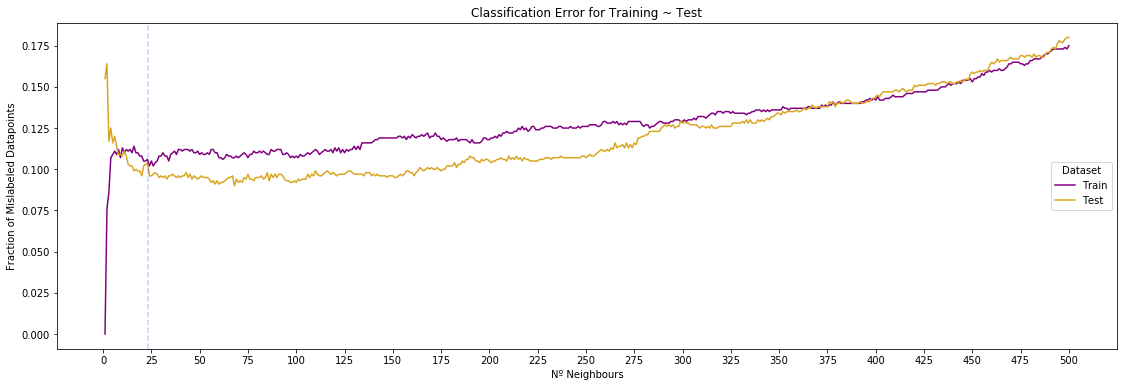

In [501]:
plt.figure(figsize=(19,6))
#plt.grid(b = True, axis= 'y',  linestyle = '--')
plt.title('Classification Error for Training ~ Test')
plt.xlabel('Nº Neighbours')
plt.ylabel('Fraction of Mislabeled Datapoints')
plt.plot(range(1,501),score_train, color = 'purple', label = 'Train')
plt.plot(range(1,501),score_test,  color = 'goldenrod', label= 'Test')
plt.xticks(np.arange(501, step = 25))
plt.legend(loc = 5, title = 'Dataset')
plt.axvline(23, color = 'b', linestyle = '--', alpha = 0.2)

In [488]:
print( 'Lower K for Test: ', score_test.index(min(score_test))) #lets find the best K
print('Lower K for Train: ',score_train.index(min(score_train[3:]))) #Finding the lower value of K for the training dataset, K number bigger than 3

Lower K for Test:  67
Lower K for Train:  23


In [478]:
print('Fraction of errors in Test for K = 67 ', score_test[67])
print('Fraction of errors in Test for K = 23 ', score_test[23])

Fraction of errors in Test for K = 67  0.08999999999999997
Fraction of errors in Test for K = 23  0.09599999999999997


**6.c)**

What trend do you see in the results?
We could observe that when the numbers of neighbors used in the training model is low, the error is very low to the training dataset. At the same time, we can observe an inverse effect on the Test dataset, the proportion of mislabeled labels rapidly decrease when we increase the number of K (in other words when we train our model with a more biased model). Theses trend tend to start to converge approximately at K =150, where the amount of mislabeled datapoints for the test dataset start to increase.


**6.d)**

The values of K the present higher bias are those where K is large (at the right of the graph), the values of K wich represent high variance are the ones where the K is low (as could it see on the left of the graph),  beeing the most extreme example of flexibility K = 1.

**6.e)**

What is the optimal value of  kk  and why?
If we only take in count the lowes error for the Test dataset we would choose $K = 67$. But given that we only tested our model with one dataset, and given that there is no big difference in the fraction of errors between $K =67$ and the K value $(K =23)$ with the minimun error for the train dataset (for values of $K > 3$) we could say that this values is the optimal. The benefits of chossing this K value (dashed line in the graph above) is that this value offers the best trade-off between bais and flexibility.




**6.f)**

The flexibility is going to be determined by the degrees of freedom of the model. In other words, the amount of parameters or hyper-parameters (as in KKN) is going to increase this degrees of freedom. It should be notice, that another element that influences the degrees of freedom is if the parametes used in the model are not independently among the other parameters.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [6]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

train = pd.DataFrame(data= {'X': x_train, 'Y': y_train}) #transform the list into a pandas dataframe
test = pd.DataFrame(data= {'X': x_test, 'Y': y_test})

**ANSWER**

Text(0,0.5,'Y')

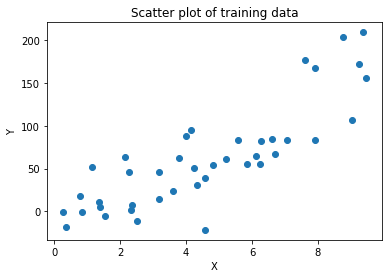

In [7]:
plt.scatter(x_train,y_train)
plt.title('Scatter plot of training data')
plt.xlabel('X')
plt.ylabel('Y')

R2 = 0.701459 
p = 0.000000 
Intercept = -21.73 
Slope = 18.30


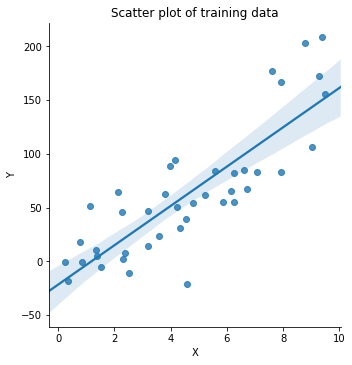

In [8]:
g = sbn.lmplot(x='X', y= 'Y', data= train)   #Sanity check using the stat.lineregress to see if my training model is correct.
plt.title("Scatter plot of training data")
slope, intercept, r_value, p_value, std_err = stats.linregress(x=train['X'], y=train['Y'])
pred_values = slope * train['X'] + intercept
residuals = train['Y'] - pred_values
print ('R2 = %f \np = %f \nIntercept = %.2f \nSlope = %.2f'% (r_value**2,p_value, intercept,slope))

**7.b)**

In [9]:
# b)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
x_train = np.array(x_train).reshape(-1,1)
model = linear_model.LinearRegression().fit(x_train, train['Y'])

In [11]:
print('R2 = %f' %model.score(x_train,y_train))
print('Intercept = %f' % model.intercept_)
print('Slope = %f' % model.coef_)
y_test_pred = model.predict(x_train)
print('MSE = %f' % mean_squared_error(y_train,y_test_pred))
#y_test_pred

R2 = 0.701459
Intercept = -21.730783
Slope = 18.303207
MSE = 1052.585366


The equation of the linear regression model is: $y = \beta_0 + \beta_1 X$
$$y = -21.73 + 18.30 X $$

**7.c)**

Let's fit a logaritmic transformation and a square transformation

In [12]:
train_new = train
train_new['logX'] = np.log(train['X'])
train_new['X^2'] = train['X']**2

In [13]:
train_new.head()

,X,Y,logX,X^2
0,3.19,46.40,1.160021,10.1761
1,9.26,172.16,2.225704,85.7476
2,9.38,209.00,2.238580,87.9844
3,8.77,203.31,2.171337,76.9129
4,7.91,82.88,2.068128,62.5681


In [14]:
#Fitting my model with a log transformation
X = train_new.drop(['Y','X^2'], axis= 1)
log_model = linear_model.LinearRegression().fit(X, train['Y'])

print('R2 = %f' %log_model.score(X,train['Y']))
print('Intercept = %f' % log_model.intercept_)
print('Slopes {B1,B2} = %f, %f' % (log_model.coef_[0],log_model.coef_[1]))
y_train_pred = log_model.predict(X)
print('MSE = %f' % mean_squared_error(train['Y'],y_train_pred))

R2 = 0.721946
Intercept = -23.680150
Slopes {B1,B2} = 25.082805, -23.330631
MSE = 980.354954


The equation of the linear regression model with a log transformation is: $y = \beta_0 + \beta_1 X + \beta_2\:\log{(X)}$
$$y = -23.68 + 25.08 X  - 23.33\log{(X)} $$

In [15]:
#Fitting my model with a square transformation
X = train_new.drop(['Y','logX'], axis= 1)
square_model = linear_model.LinearRegression().fit(X, train['Y'])
print('R2 = %f' %square_model.score(X,train['Y']))
print('Intercept = %f' % square_model.intercept_)
print('Slopes {B1,B2} = %f, %f' % (square_model.coef_[0],square_model.coef_[1]))
y_train_pred = square_model.predict(X)
print('MSE = %f' % mean_squared_error(train['Y'],y_train_pred))

R2 = 0.749048
Intercept = 8.007337
Slopes {B1,B2} = 0.471007, 1.832082
MSE = 884.797760


The equation of the linear regression model with a quadratic transformation is: $y = \beta_0 + \beta_1 X + \beta_2 X^2$
$$y = 8.007 + 0.471 X   1.832 X^2 $$

**7.d)**
Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

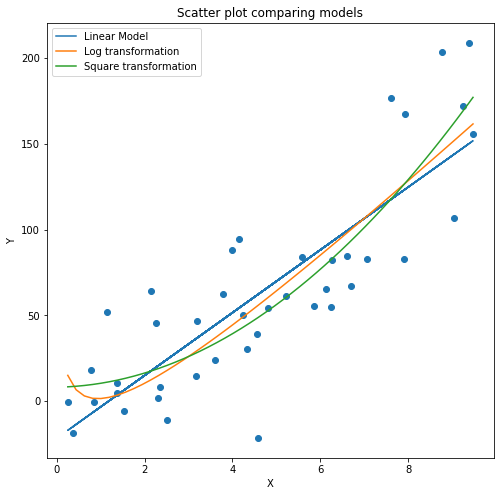

In [16]:
# Alternative approach only with the coefficients
'''
def formula(x):
    return (-21.73 + 18.30*x)
plt.plot(train['X'],formula(train['X']))
'''
def formula_log(x):
    return (-23.68 + (25.08*x)  - (23.33* np.log(x)))
def formula_square(x):
    return ( 8.007 + (0.471*x) +  1.832*(x**2))
x_axis = np.linspace(min(train['X']),max(train['X']))

#Plotting
plt.figure(figsize= (8,8))
plt.scatter(train['X'],train['Y'], label = None)
plt.plot(train['X'],model.predict(x_train),label='Linear Model')
plt.plot(x_axis,formula_log(x_axis),label='Log transformation')
plt.plot(x_axis,formula_square(x_axis), label='Square transformation')
plt.title('Scatter plot comparing models')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

**7.e)**

In [17]:
#linear model 
xtest = np.array(test['X']).reshape(-1,1)
ytest = np.array(test['Y']).reshape(-1,1)
model_y_predict = model.predict(xtest)
print('R2 = %f' % r2_score(ytest,model_y_predict))
print('MSE = %f' % mean_squared_error(ytest,model_y_predict))

R2 = 0.555647
MSE = 2023.312109


In [18]:
#Apply transformations to my test data.
test['X^2'] = test['X']**2 
test['log(X)'] =np.log(test['X'])
test.head(2)

,X,Y,X^2,log(X)
0,5.65,98.52,31.9225,1.731656
1,0.07,16.09,0.0049,-2.659260


In [19]:
# Square model 
model_y_predict = square_model.predict(test[['X','X^2']])
print('R2 = %f' % r2_score(ytest,model_y_predict))
print('MSE = %f' % mean_squared_error(ytest,model_y_predict))

R2 = 0.692782
MSE = 1398.881758


In [20]:
# Log model 
model_y_predict = log_model.predict(test[['X','log(X)']])
print('R2 = %f' % r2_score(ytest,model_y_predict))
print('MSE = %f' % mean_squared_error(ytest,model_y_predict))

R2 = 0.631850
MSE = 1676.328705


**7.f)** 

Three model were trained using the same training set, a linear regression model, a linear regression with a log transformation and a linear regression with a quadratic transformation. The model that performed better on the training data was the model with a quadratic transformation $(R^2=0.749, MSE=884.79)$. The model that was more accurate to predict new data was also the square model $(R^2=0.691, MSE=1398).$

**7.g)**

In the case that the test data were significantly different from the training dataset it would affect in a diferent way to the models tested. Given that the linear model is the more biased from the three, is going to be less sensitive to the variance of new data, experimenting minor changes in the predictability in comparision with the the square and logaritmic models. 